<a href="https://colab.research.google.com/github/Kasosa/Jilowa/blob/main/Diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd

# Generate example time series data
normal_data = np.random.normal(loc=0, scale=1, size=(100, 1))  # Normal data
anomaly_data = np.random.normal(loc=5, scale=1, size=(10, 1))   # Anomalous data

# Combine normal and anomalous data
data = np.vstack((normal_data, anomaly_data))

# Create a DataFrame with a timestamp for each data point
timestamps = pd.date_range(start='2024-01-01', periods=len(data), freq='D')
df = pd.DataFrame(data, columns=['value'], index=timestamps)

# Feature engineering: add time-related features if necessary
df['dayofweek'] = df.index.dayofweek
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

# Define the training data
X_train = df.drop(columns=['value'])  # Use features as input
y_train = df['value']  # Use the target variable for supervised learning

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)  # Adjust parameters as needed
xgb_model.fit(X_train, y_train)

# Make predictions on the training data
predictions = xgb_model.predict(X_train)

# Calculate residuals (difference between actual and predicted values)
residuals = y_train - predictions

# Define a threshold for anomaly detection (e.g., based on quantiles or standard deviations)
threshold = np.percentile(np.abs(residuals), 95)  # Adjust the percentile as needed

# Detect anomalies based on the threshold
anomalies = df[np.abs(residuals) > threshold]

print("Detected anomalies:")
print(anomalies)


Detected anomalies:
               value  dayofweek  day  month  year
2024-01-18  0.524574          3   18      1  2024
2024-01-24 -0.764209          2   24      1  2024
2024-02-15 -0.435224          3   15      2  2024
2024-02-22 -0.930451          3   22      2  2024
2024-02-24  1.979749          5   24      2  2024
2024-03-22  0.998721          4   22      3  2024


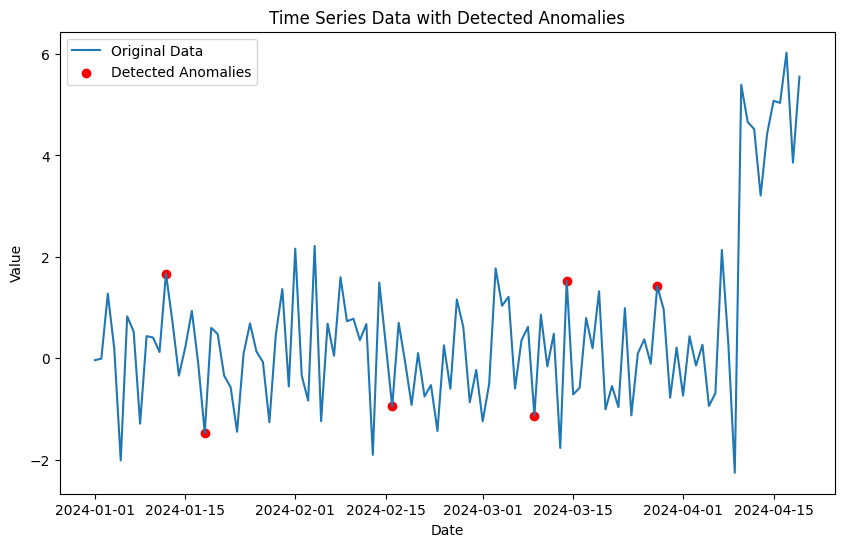

Detected anomalies:
               value  dayofweek  day  month  year
2024-01-12  1.672175          4   12      1  2024
2024-01-18 -1.471482          3   18      1  2024
2024-02-16 -0.949212          4   16      2  2024
2024-03-09 -1.129696          5    9      3  2024
2024-03-14  1.530457          3   14      3  2024
2024-03-28  1.423511          3   28      3  2024


In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate example time series data
normal_data = np.random.normal(loc=0, scale=1, size=(100, 1))  # Normal data
anomaly_data = np.random.normal(loc=5, scale=1, size=(10, 1))   # Anomalous data

# Combine normal and anomalous data
data = np.vstack((normal_data, anomaly_data))

# Create a DataFrame with a timestamp for each data point
timestamps = pd.date_range(start='2024-01-01', periods=len(data), freq='D')
df = pd.DataFrame(data, columns=['value'], index=timestamps)

# Feature engineering: add time-related features if necessary
df['dayofweek'] = df.index.dayofweek
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

# Define the training data
X_train = df.drop(columns=['value'])  # Use features as input
y_train = df['value']  # Use the target variable for supervised learning

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)  # Adjust parameters as needed
xgb_model.fit(X_train, y_train)

# Make predictions on the training data
predictions = xgb_model.predict(X_train)

# Calculate residuals (difference between actual and predicted values)
residuals = y_train - predictions

# Define a threshold for anomaly detection (e.g., based on quantiles or standard deviations)
threshold = np.percentile(np.abs(residuals), 95)  # Adjust the percentile as needed

# Detect anomalies based on the threshold
anomalies = df[np.abs(residuals) > threshold]

# Visualize time series data and detected anomalies
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.scatter(anomalies.index, anomalies['value'], color='red', label='Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Detected Anomalies')
plt.legend()
plt.show()

print("Detected anomalies:")
print(anomalies)
